<a href="https://colab.research.google.com/github/Angelo92Git/ML_Simple_System/blob/main/Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generate inputs and states data:
import numpy as np

X = np.arange(-20, 20.1, 0.1)
U = -2*np.cos(X)

In [ ]:
# Machine Learning for a simple scalar system

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import math

# device config
#device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

# hyper parameters
input_size = 2
hidden_size = 1300
output_size = 1
num_epochs = 3000
batch_size = 401
learning_rate = 0.1

# Prepare Dataset
class state_inp_dataset(Dataset):

    def __init__(self):
        # data loading
        # Xnp = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Simple_Model/data/states.txt')
        # Unp = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Simple_Model/data/inputs.txt')
        Xnp = X
        Unp = U
        Ynp = np.roll(Xnp, -1)
        XUnp = np.array(list(zip(Xnp, Unp)))
        self.xu = torch.from_numpy(XUnp[:])
        print('xu:', self.xu.shape)
        self.y = torch.from_numpy(Ynp).view(Ynp.shape[0],1)
        print('y:', self.y.shape)
        self.n_samples = Xnp.shape[0]

    def __getitem__(self, index):
        # dataset[0] - permits indexing
        return self.xu[index], self.y[index]

    def __len__(self):
        # len(dataset) - permits use of len function
        return self.n_samples


dataset = state_inp_dataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size)

total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)
print(f'samples: {total_samples}, iterations: {n_iterations}')

# define model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.hyperbolicTangent = nn.Tanh()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.hyperbolicTangent(out)
        out = self.l2(out)
        return out


model = NeuralNet(input_size, hidden_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(dataloader)
for epoch in range(num_epochs):
    for i, (xu, y) in enumerate(dataloader):
        # format data item to feed into model
        xu = xu.reshape(-1, 2)
        # print('shape: ', xu.shape)
         
        # forward pass
        y_predicted = model(xu.float())
        loss = criterion(y_predicted.float(), y.float())

        #backward pass
        optimizer.zero_grad()  # zero the gradients after each epoch
        loss.backward()
        optimizer.step()

        if (epoch+1) % 50 == 0:
          print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


xu: torch.Size([401, 2])
y: torch.Size([401, 1])
samples: 401, iterations: 1
epoch 50 / 3000, step 1/1, loss = 10.7259
epoch 100 / 3000, step 1/1, loss = 3.8553
epoch 150 / 3000, step 1/1, loss = 3.3342
epoch 200 / 3000, step 1/1, loss = 3.1533
epoch 250 / 3000, step 1/1, loss = 3.0567
epoch 300 / 3000, step 1/1, loss = 2.9816
epoch 350 / 3000, step 1/1, loss = 2.9111
epoch 400 / 3000, step 1/1, loss = 2.8398
epoch 450 / 3000, step 1/1, loss = 2.7649
epoch 500 / 3000, step 1/1, loss = 2.6867
epoch 550 / 3000, step 1/1, loss = 2.6034
epoch 600 / 3000, step 1/1, loss = 2.5142
epoch 650 / 3000, step 1/1, loss = 2.4165
epoch 700 / 3000, step 1/1, loss = 2.3091
epoch 750 / 3000, step 1/1, loss = 2.1921
epoch 800 / 3000, step 1/1, loss = 2.0636
epoch 850 / 3000, step 1/1, loss = 1.9221
epoch 900 / 3000, step 1/1, loss = 1.9873
epoch 950 / 3000, step 1/1, loss = 1.6674
epoch 1000 / 3000, step 1/1, loss = 6.3044
epoch 1050 / 3000, step 1/1, loss = 1.4550
epoch 1100 / 3000, step 1/1, loss = 11.

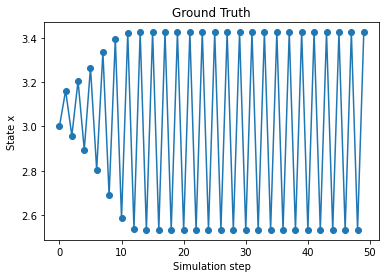

In [ ]:
# Reference Solution  

# Only the NL section has been implemented as of current date

Nsim = 50
x = np.zeros((Nsim, 1))
u = np.zeros((Nsim-1, 1))
x[0] = 3
mode = 'NL'

def main():
    if mode == 'L':  # Linear
        for i in range(0, Nsim-1):
            # Linear
            # u[i] = -1.05*x[i]
            # x[i+1] = 2*x[i] + u[i] + 0.01*np.sin(x[i]/10)
            print('Not Implemented')

    elif mode == 'NL':  # Non-Linear
        for i in range(0, Nsim - 1):
            # NL
            u[i] = -2*np.cos(x[i])
            x[i+1] = 2*np.sin(x[i]) + u[i] + 0.1*x[i]**2
    else:
        print('Wrong Mode')

    plt.plot(x, marker='o')
    plt.xlabel('Simulation step')
    plt.ylabel('State x')
    plt.title('Ground Truth')
    plt.show()

if __name__ == '__main__':
    main()


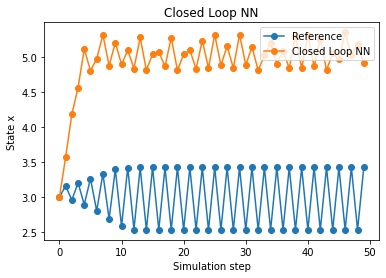

In [ ]:
# Closed Loop Model Performance

# Only the NL section has been implemented as of current date

Nsim = 50
x_np = np.zeros((Nsim, 1))
u_np = np.zeros((Nsim-1, 1))
x_np[0] = 3

x_c = torch.from_numpy(x_np)
u_c = torch.from_numpy(u_np)

mode = 'NL'

# Reference Solution
if mode == 'L':  # Linear
    for i in range(0, Nsim-1):
        # Linear
        # u_np[i] = -1.05*x_np[i]
        # x_np[i+1] = 2*x_np[i] + u_np[i] + 0.01*np.sin(x_np[i]/10)
        print('Not Implemented')
elif mode == 'NL':  # Non-Linear
    for i in range(0, Nsim - 1):
        # NL
        u_np[i] = -2*np.cos(x_np[i])
        x_np[i+1] = 2*np.sin(x_np[i]) + u_np[i] + 0.1*x_np[i]**2
else:
    print('Wrong Mode')

plt.plot(x_np, marker='o', label='Reference')

# Neural Net Solution:
if mode == 'L':  # Linear
    # for i in range(0, Nsim-1):
    #     # Linear
    #     u[i] = -1.05*x[i]
    #     x[i+1] = 2*x[i] + u[i] + 0.01*np.sin(x[i]/10)
    print('Not Implemented')

elif mode == 'NL':  # Non-Linear
    for i in range(0, Nsim - 1):
        # NL
        u_c[i] = torch.mul(-2,torch.cos(x_c[i]))
        xu_c = torch.cat((x_c[i], u_c[i]), 0)
        xu_c = xu_c.view(-1, 2)
        # print(xu.shape)
        x_c[i+1] = model(xu_c.float())
        # print(x[i+1])
        # x[i+1] = 2*np.sin(x[i]) + u[i] + 0.1*x[i]**2
else:
    print('Wrong Mode')

with torch.no_grad():
  plt.plot(x_c.numpy(), marker='o', label='Closed Loop NN')


plt.xlabel('Simulation step')
plt.ylabel('State x')
plt.legend(loc='upper right')
plt.title('Closed Loop NN')
plt.show()


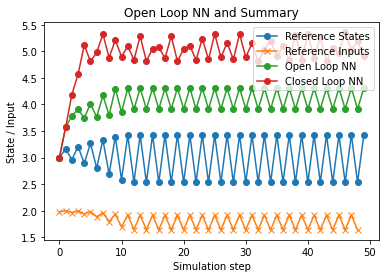

In [ ]:
# Open Loop Model Performance

Nsim = 50
x_np = np.zeros((Nsim, 1))
u_np = np.zeros((Nsim-1, 1))
x_np[0] = 3

x_o = torch.from_numpy(x_np)

mode = 'NL'

# Reference Solution
if mode == 'L':  # Linear
    for i in range(0, Nsim-1):
        # Linear
        # u_np[i] = -1.05*x_np[i]
        # x_np[i+1] = 2*x_np[i] + u_np[i] + 0.01*np.sin(x_np[i]/10)
        print('Not Implemented')

elif mode == 'NL':  # Non-Linear
    for i in range(0, Nsim - 1):
        # NL
        u_np[i] = -2*np.cos(x_np[i])
        x_np[i+1] = 2*np.sin(x_np[i]) + u_np[i] + 0.1*x_np[i]**2
else:
    print('Wrong Mode')

plt.plot(x_np, marker='o', label='Reference States')
plt.plot(u_np, marker='x', label='Reference Inputs')

# Neural Net Solution:
u_o = torch.from_numpy(u_np)  # open loop, u is derived from ground truth
if mode == 'L':  # Linear
    # for i in range(0, Nsim-1):
    #     # Linear
    #     u[i] = -1.05*x[i]
    #     x[i+1] = 2*x[i] + u[i] + 0.01*np.sin(x[i]/10)
    print('Not Implemented')
elif mode == 'NL':  # Non-Linear
    for i in range(0, Nsim - 1):
        # NL
        xu_o = torch.cat((x_o[i], u_o[i]), 0)
        xu_o = xu_o.view(-1, 2)
        # print(xu.shape)
        x_o[i+1] = model(xu_o.float())
        # print(x[i+1])
        # x[i+1] = 2*np.sin(x[i]) + u[i] + 0.1*x[i]**2
else:
    print('Wrong Mode')

with torch.no_grad():
  plt.plot(x_o.numpy(), marker='o', label='Open Loop NN')
  plt.plot(x_c.numpy(), marker='o', label='Closed Loop NN')

plt.xlabel('Simulation step')
plt.ylabel('State / Input')
plt.legend(loc='upper right')
plt.title('Open Loop NN and Summary')
plt.show()

